In [1]:
import numpy as np

from keras.preprocessing.image import ImageDataGenerator
from keras import layers
from keras import models
from keras import optimizers

import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
import os, shutil

base_dir = r'data/splited'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

In [3]:
# due to a bug when trying to use tensorflow-gpu==2.0.0 and cudnn_v_7.6.1
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [4]:
img_rows = 150
img_cols = 150
epochs = 20
batch_size = 20
num_of_train_samples = 1651
num_of_test_samples = 504
num_of_validation_samples = 360

In [5]:
train_datagen = ImageDataGenerator(rescale = 1./255, rotation_range=40, fill_mode='constant', cval = 0)
validation_datagen = ImageDataGenerator(rescale = 1./255)
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size = (img_rows, img_cols),
                                                    batch_size = batch_size,
                                                    class_mode = 'categorical')

validation_generator = validation_datagen.flow_from_directory(validation_dir,
                                                        target_size = (img_rows, img_cols),
                                                        batch_size = batch_size,
                                                        class_mode = 'categorical',
                                                        shuffle = False)

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(test_dir,
                                                        target_size = (img_rows, img_cols),
                                                        batch_size = 20,
                                                        class_mode = 'categorical',
                                                        shuffle = False)

Found 1651 images belonging to 36 classes.
Found 360 images belonging to 36 classes.
Found 504 images belonging to 36 classes.


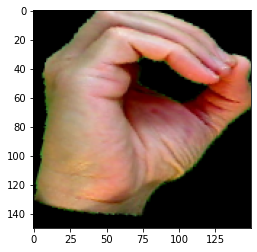

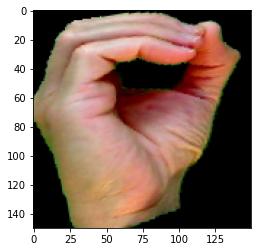

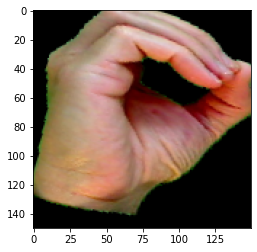

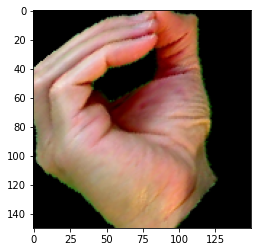

In [6]:
from keras.preprocessing import image
img_path = r'0.0.png'
img = image.load_img(img_path, target_size=(150, 150))

x = image.img_to_array(img)
x = x.reshape((1,) + x.shape)
i = 0
for batch in train_datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break
        
plt.show()

In [7]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
# model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation = 'relu'))
model.add(layers.Dense(36, activation = 'softmax'))

In [8]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = optimizers.RMSprop(lr=1e-4),
              metrics = ['acc'])

In [9]:
history = model.fit_generator(train_generator,
                              steps_per_epoch = num_of_train_samples // batch_size,
                              epochs = epochs,
                              validation_data = validation_generator,
                              validation_steps = num_of_validation_samples // batch_size)


Epoch 1/20
82/82 [==============================] - 25s 308ms/step - loss: 3.3013 - acc: 0.1380 - val_loss: 2.3390 - val_acc: 0.3639
Epoch 2/20
82/82 [==============================] - 15s 185ms/step - loss: 1.7729 - acc: 0.4660 - val_loss: 0.8073 - val_acc: 0.6306
Epoch 3/20
82/82 [==============================] - 22s 271ms/step - loss: 1.1958 - acc: 0.6168 - val_loss: 0.4028 - val_acc: 0.7167
Epoch 4/20
82/82 [==============================] - 23s 275ms/step - loss: 0.9429 - acc: 0.7039 - val_loss: 0.4988 - val_acc: 0.8000
Epoch 5/20
82/82 [==============================] - 28s 337ms/step - loss: 0.7583 - acc: 0.7517 - val_loss: 0.0338 - val_acc: 0.7722
Epoch 6/20
82/82 [==============================] - 28s 344ms/step - loss: 0.6266 - acc: 0.8030 - val_loss: 0.2330 - val_acc: 0.8417
Epoch 7/20
82/82 [==============================] - 28s 338ms/step - loss: 0.5637 - acc: 0.8064 - val_loss: 0.0618 - val_acc: 0.8500
Epoch 8/20
82/82 [==============================] - 28s 344ms/step - 

In [10]:
model.save('models//CNN.h5')

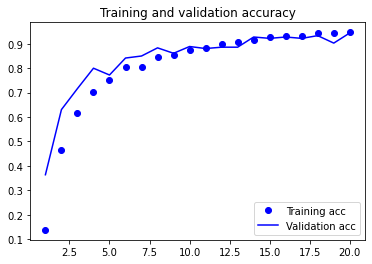

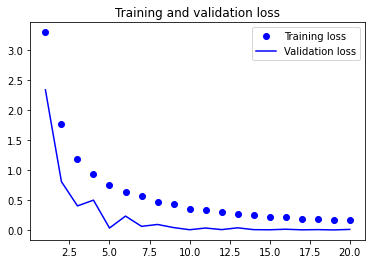

In [11]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

0.9444444444444444
Classification report
              precision    recall  f1-score   support

           0       1.00      0.80      0.89        10
           1       1.00      1.00      1.00        10
           2       1.00      0.60      0.75        10
           3       1.00      1.00      1.00        10
           4       0.91      1.00      0.95        10
           5       1.00      0.90      0.95        10
           6       0.73      0.80      0.76        10
           7       1.00      1.00      1.00        10
           8       1.00      1.00      1.00        10
           9       1.00      1.00      1.00        10
           A       1.00      0.90      0.95        10
           B       0.83      1.00      0.91        10
           C       1.00      1.00      1.00        10
           D       1.00      0.90      0.95        10
           E       1.00      0.90      0.95        10
           F       1.00      0.90      0.95        10
           G       1.00      1.00      1

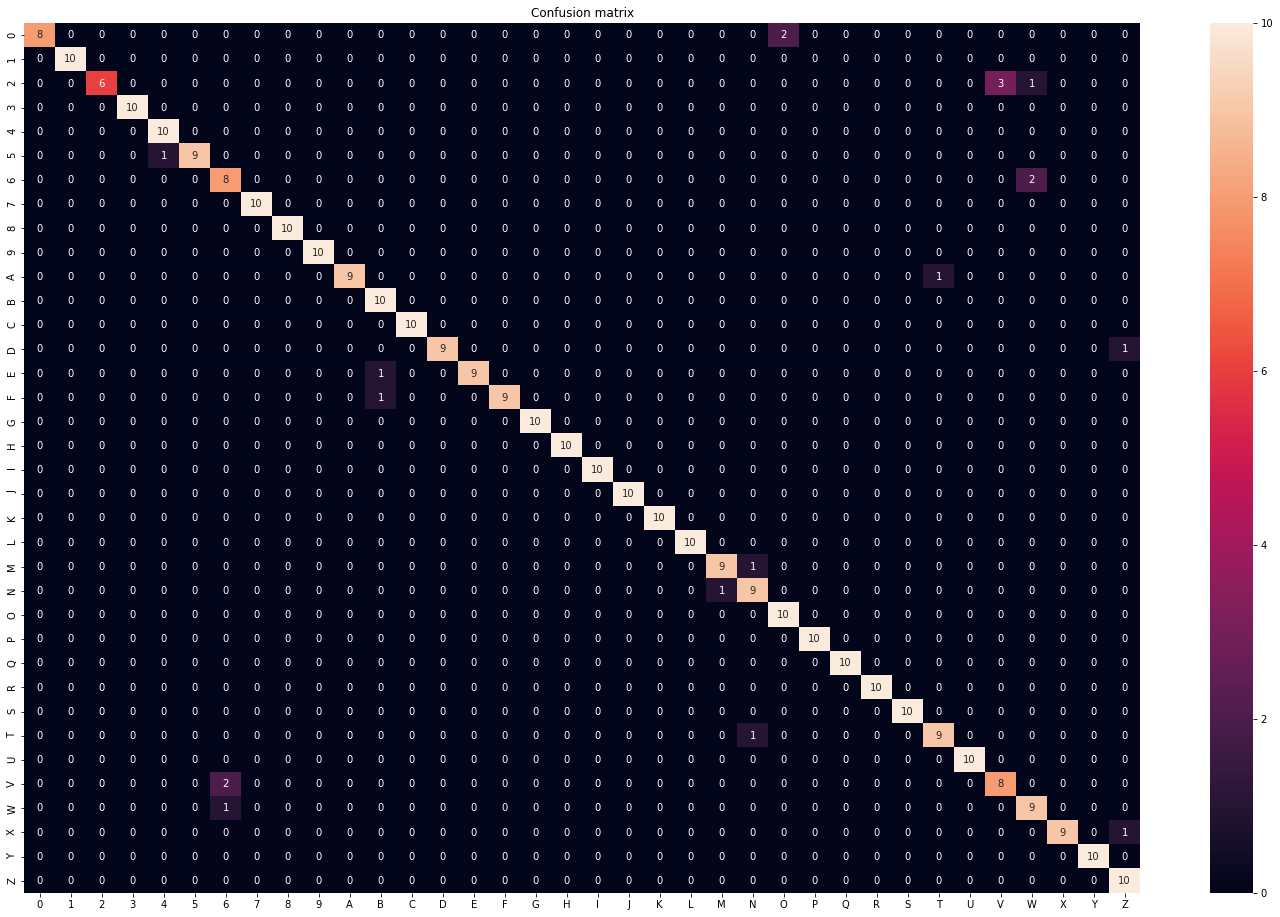

In [12]:
# results on validation data
from utils.report import report

y_pred_validation = model.predict_generator(validation_generator, num_of_validation_samples // batch_size)
y_pred_validation = np.argmax(y_pred_validation, axis=1)

report(validation_generator.classes, y_pred_validation)

0.944
Classification report
              precision    recall  f1-score   support

           0       1.00      0.79      0.88        14
           1       1.00      1.00      1.00        14
           2       0.92      0.79      0.85        14
           3       1.00      1.00      1.00        14
           4       0.93      1.00      0.97        14
           5       1.00      1.00      1.00        14
           6       0.80      0.57      0.67        14
           7       1.00      1.00      1.00        14
           8       1.00      1.00      1.00        14
           9       1.00      1.00      1.00        14
           A       1.00      0.64      0.78        14
           B       0.93      0.93      0.93        14
           C       1.00      1.00      1.00        14
           D       1.00      1.00      1.00        14
           E       1.00      1.00      1.00        14
           F       1.00      1.00      1.00        14
           G       1.00      1.00      1.00        14

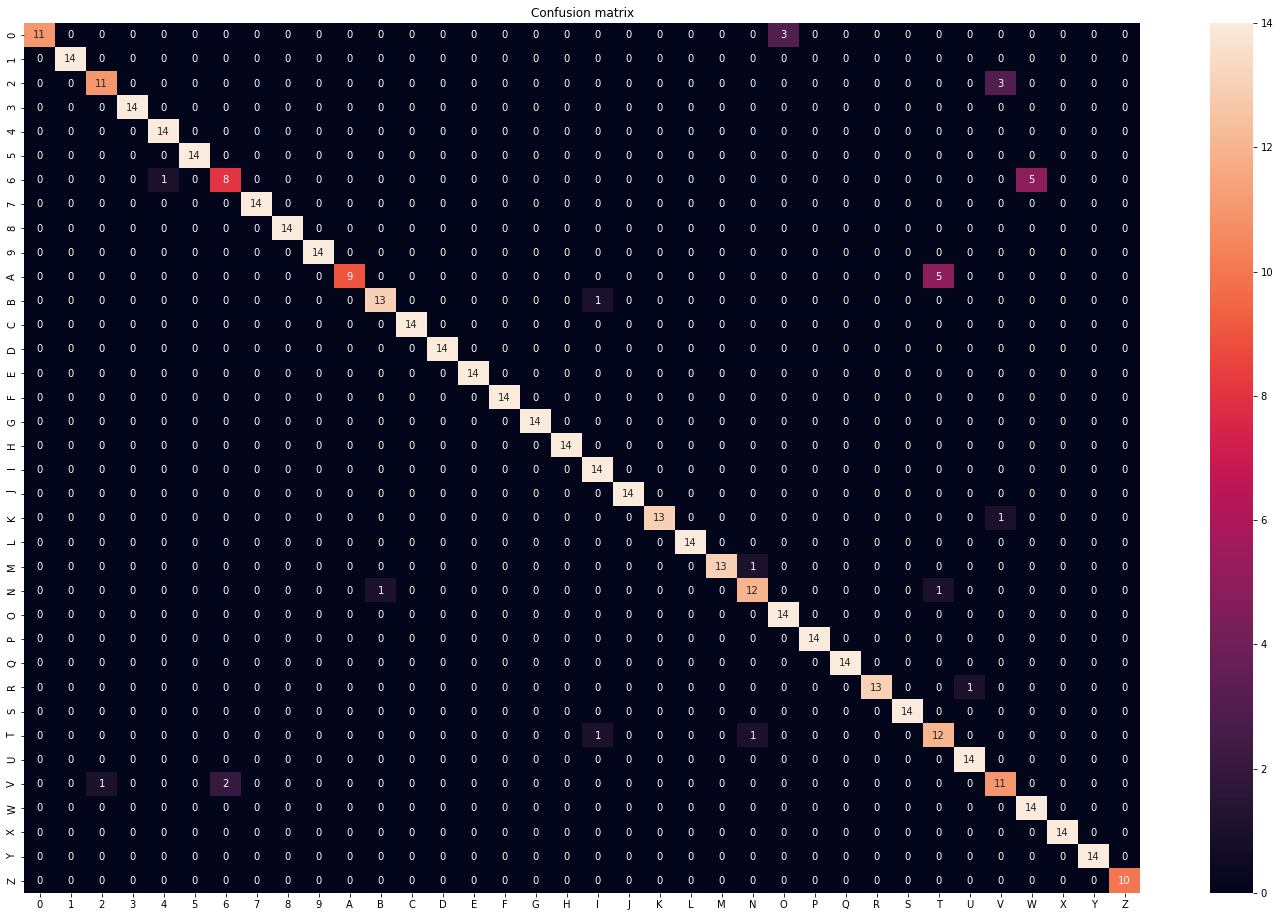

In [13]:
# results on test data
from utils.report import report

y_pred_test = model.predict_generator(test_generator, num_of_test_samples // batch_size)
y_pred_test = np.argmax(y_pred_test, axis=1)

report(test_generator.classes[:500], y_pred_test)